[View in Colaboratory](https://colab.research.google.com/github/adowaconan/Deep_learning_fMRI/blob/master/1_perceptron.ipynb)

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='https://qph.ec.quoracdn.net/main-qimg-a75b416f299b0d3cf9ce916f414c0e63')

# some basic formula used in the figure above

In [0]:
def activation(weight_i, x_i,bias):
    return sum(weight_i * x_i )+bias
def update_weight(w,learning_rate,expected,predicted,x):
    return w + learning_rate * (expected - predicted)*x
def predict(row,weights):
    activation = weights[0]
    for ii in range(len(row)-1):
        activation += weights[ii+1]*row[ii]
    return 1.0 if activation >= 0.0 else 0.0

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1


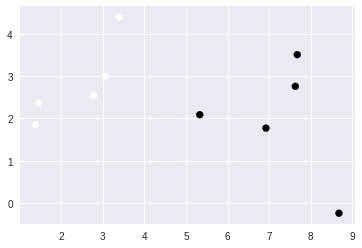

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# test predictions
dataset = np.array([[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]])
plt.scatter(dataset[:,0],dataset[:,1],c=dataset[:,2])
weights = [-0.1, 0.20653640140000007, -0.23418117710000003]
for row in dataset:
	prediction = predict(row, weights)
	print("Expected=%d, Predicted=%d" % (row[-1], prediction))

In [0]:
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights

In [6]:
l_rate = 0.1
n_epoch = 5
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=2.000
>epoch=1, lrate=0.100, error=1.000
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
[-0.1, 0.20653640140000007, -0.23418117710000003]


# a standard way to upload data from your google drive to the working colab space

In [0]:
file_id='1F9a2jvncfH3mXjmQwAFMyzyLJhLOeiPL'
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

import numpy as np
zip_import = drive.CreateFile({'id':file_id})
zip_import.GetContentFile('sonar_all-data.txt')

In [10]:
ls

datalab/  sonar_all-data.txt


In [0]:
from random import randrange
from csv import reader
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
	class_values = [row[column] for row in dataset]
	unique = set(class_values)
	lookup = dict()
	for i, value in enumerate(unique):
		lookup[value] = i
	for row in dataset:
		row[column] = lookup[row[column]]
	return lookup
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0
 
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
	return weights
 
# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
	predictions = list()
	weights = train_weights(train, l_rate, n_epoch)
	for row in test:
		prediction = predict(row, weights)
		predictions.append(prediction)
	return(predictions)

In [17]:
# Test the Perceptron algorithm on the sonar dataset
np.random.seed(1)
# load and prepare data
filename = '/content/sonar_all-data.txt'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
	str_column_to_float(dataset, i)
# convert string class to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 3
l_rate = 0.01
n_epoch = 500
scores = evaluate_algorithm(dataset, perceptron, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [62.31884057971014, 59.42028985507246, 71.01449275362319]
Mean Accuracy: 64.251%


# Iris data

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url='http://scikit-learn.org/stable/_images/sphx_glr_plot_forest_iris_001.png')

In [6]:
print('source:{}'.format('https://academic.oup.com/cercor/advance-article/doi/10.1093/cercor/bhx268/4560155'))
Image(url='https://oup.silverchair-cdn.com/oup/backfile/Content_public/Journal/cercor/PAP/10.1093_cercor_bhx268/1/m_bhx268f01.png?Expires=1527070979&Signature=aNpLSjtFFIJscPDidI~jEdVAhhOzMCsbKbjLm3LpMGCscGhv3vr-Apz7HXpilMqELSnlb3tMPM5Qwg8n64JFzwPZmUlbp7Wk9p8vt561ybmuRW01QIGD7odfpwvOsGCDR3e4ipnnUcXNdfcBeWBVCZBb1~Yiu-u-Gc5Tzwqnj0fLxbJabNws8UqLO9H7XMmtRdrrLma-cw13cGnZUwk4zWsc65TwvC1DuuKMQ~8eoaPOVyWq8NDRBMfIROquUXrgwq8yUvs81TRQ6LbN05mPi9cPmYRVMtfRhIhQ4dzSraJtwgqBdMDZ69673VNxNzLp4eqXVra8A1C1O0scNCItkQ__&Key-Pair-Id=APKAIE5G5CRDK6RD3PGA'
  )


source:https://academic.oup.com/cercor/advance-article/doi/10.1093/cercor/bhx268/4560155
